<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/categorical_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Loading in and installing visualization libraries
library(ggplot2)
install.packages('gridExtra')
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/data/data_w_5_clusters.csv")
df$clusters <- as.factor(df$clusters)
# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columns from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 15 columns in the data.
---------------------------------------------------------------------------------------------------

  Age    Sex Cancer Coronary_heart_disease Depression Smoked_100_cig
1  64   Male    Yes                    Yes         No            Yes
2  37 Female     No                     No         No             No
3  72 Female     No                     No         No             No
4  84 Female     No                     No         No             No
5  31 Female     No                     No         No            Yes
6  81 Female    Yes                     No         No             No
     Education Region     Anxiety Height Weight Sleep_hours Aerobic.Strength
1         Bach  South Few times Y     74    235           8          Aerobic
2         Bach  South     Monthly     69    218           9          Aerobic
3 Some College  South       Never     64    240           8          Neither
4   Assoc Tech  South Few times Y     66    183           8

The dataset was clustered using K-Means on the first 20 components derived from a Factor Analysis of Mixed Data (FAMD), as detailed in the [FAMD NOtebook](https://github.com/Cstan1987stat/health-survey-cluster-analysis/blob/main/notebooks/famd_notebook.ipynb). The resulting cluster labels were then appended to the original dataset for easy interpretation of clusters down the road. The clustering process is documented in the [Initial Kmeans Clustering Notebook](https://github.com/Cstan1987stat/health-survey-cluster-analysis/blob/main/notebooks/initial_kmeans_clustering.ipynb). The final cluster distribution is as follows: Cluster 4 represents approximately 40.93% of the data, Cluster 3 accounts for 36.92%, Cluster 2 for 18.47%, Cluster 5 for 2.25%, and Cluster 1 for 1.42%. This imbalance in cluster sizes was considered in downstream modeling, particularly when addressing class imbalance in classification tasks.

In [9]:
# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')

## Contingency Table

In [10]:
for (var in cat_cols){
    cat('Contingency table for Clusters and',var,'variable \n')
    # Creating contingency table, ct, with the col1 and col2 columns
    ct <- table(df[['clusters']], df[[var]])
    # Creating a proportion table based on ct, convert to percentages, and round to three decimal places
    pt <- round(prop.table(ct) * 100, 2)
    print(pt)
    cat('--------------------------------------------------------\n')
}

Contingency table for Clusters and Sex variable 
   
    Female  Male
  1   0.72  0.71
  2  14.03  4.44
  3  35.61  1.31
  4   0.94 39.99
  5   1.00  1.25
--------------------------------------------------------
Contingency table for Clusters and Cancer variable 
   
       No   Yes
  1  1.27  0.16
  2 16.00  2.48
  3 32.23  4.70
  4 36.35  4.58
  5  1.99  0.26
--------------------------------------------------------
Contingency table for Clusters and Coronary_heart_disease variable 
   
       No   Yes
  1  1.33  0.10
  2 17.20  1.27
  3 35.73  1.19
  4 37.94  2.99
  5  2.06  0.19
--------------------------------------------------------
Contingency table for Clusters and Depression variable 
   
       No   Yes
  1  1.13  0.29
  2  4.04 14.43
  3 35.27  1.66
  4 38.19  2.74
  5  1.71  0.54
--------------------------------------------------------
Contingency table for Clusters and Smoked_100_cig variable 
   
       No   Yes
  1  0.72  0.70
  2  9.15  9.32
  3 26.31 10.61
  4 23.09 17.

**Sex**
* Cluster 1: Roughly equal females and males.
* Cluster 2: More females than males.
* Cluster 3: Many more females than males.
* Cluster 4: Many more males than females.
* Cluster 5: Slightly more males than females.

**Cancer**
* All clusters: More people without cancer.

**Coronary Heart Disease**
* All clusters: More people without heart disease.


**Depression**
* Cluster 2: More people with depression.
* Other clusters: More people without depression.

**Smoked_100_cig**
* Cluster 1: Slightly more non-smokers.
* Cluster 2: Slightly more smokers.
* Clusters 3 and 4: More non-smokers.
* Cluster 5: More smokers.

**Education**
* Cluster 1: Only 12th grade, no diploma.
* Cluster 2: Mostly high school.
* Clusters 3 and 4: Mostly bachelor's degrees.
* Cluster 5: Only GED.

**Region**
* All clusters: Most people from the South.


**Anxiety**
* Clusters 1 and 5: Mostly never anxious.
* Cluster 2: Mostly anxious daily.
* Clusters 3 and 4: Mostly anxious a few times/year.

**Aerobic.Strength**
* All clusters: Mostly meet neither guideline.

## Plots

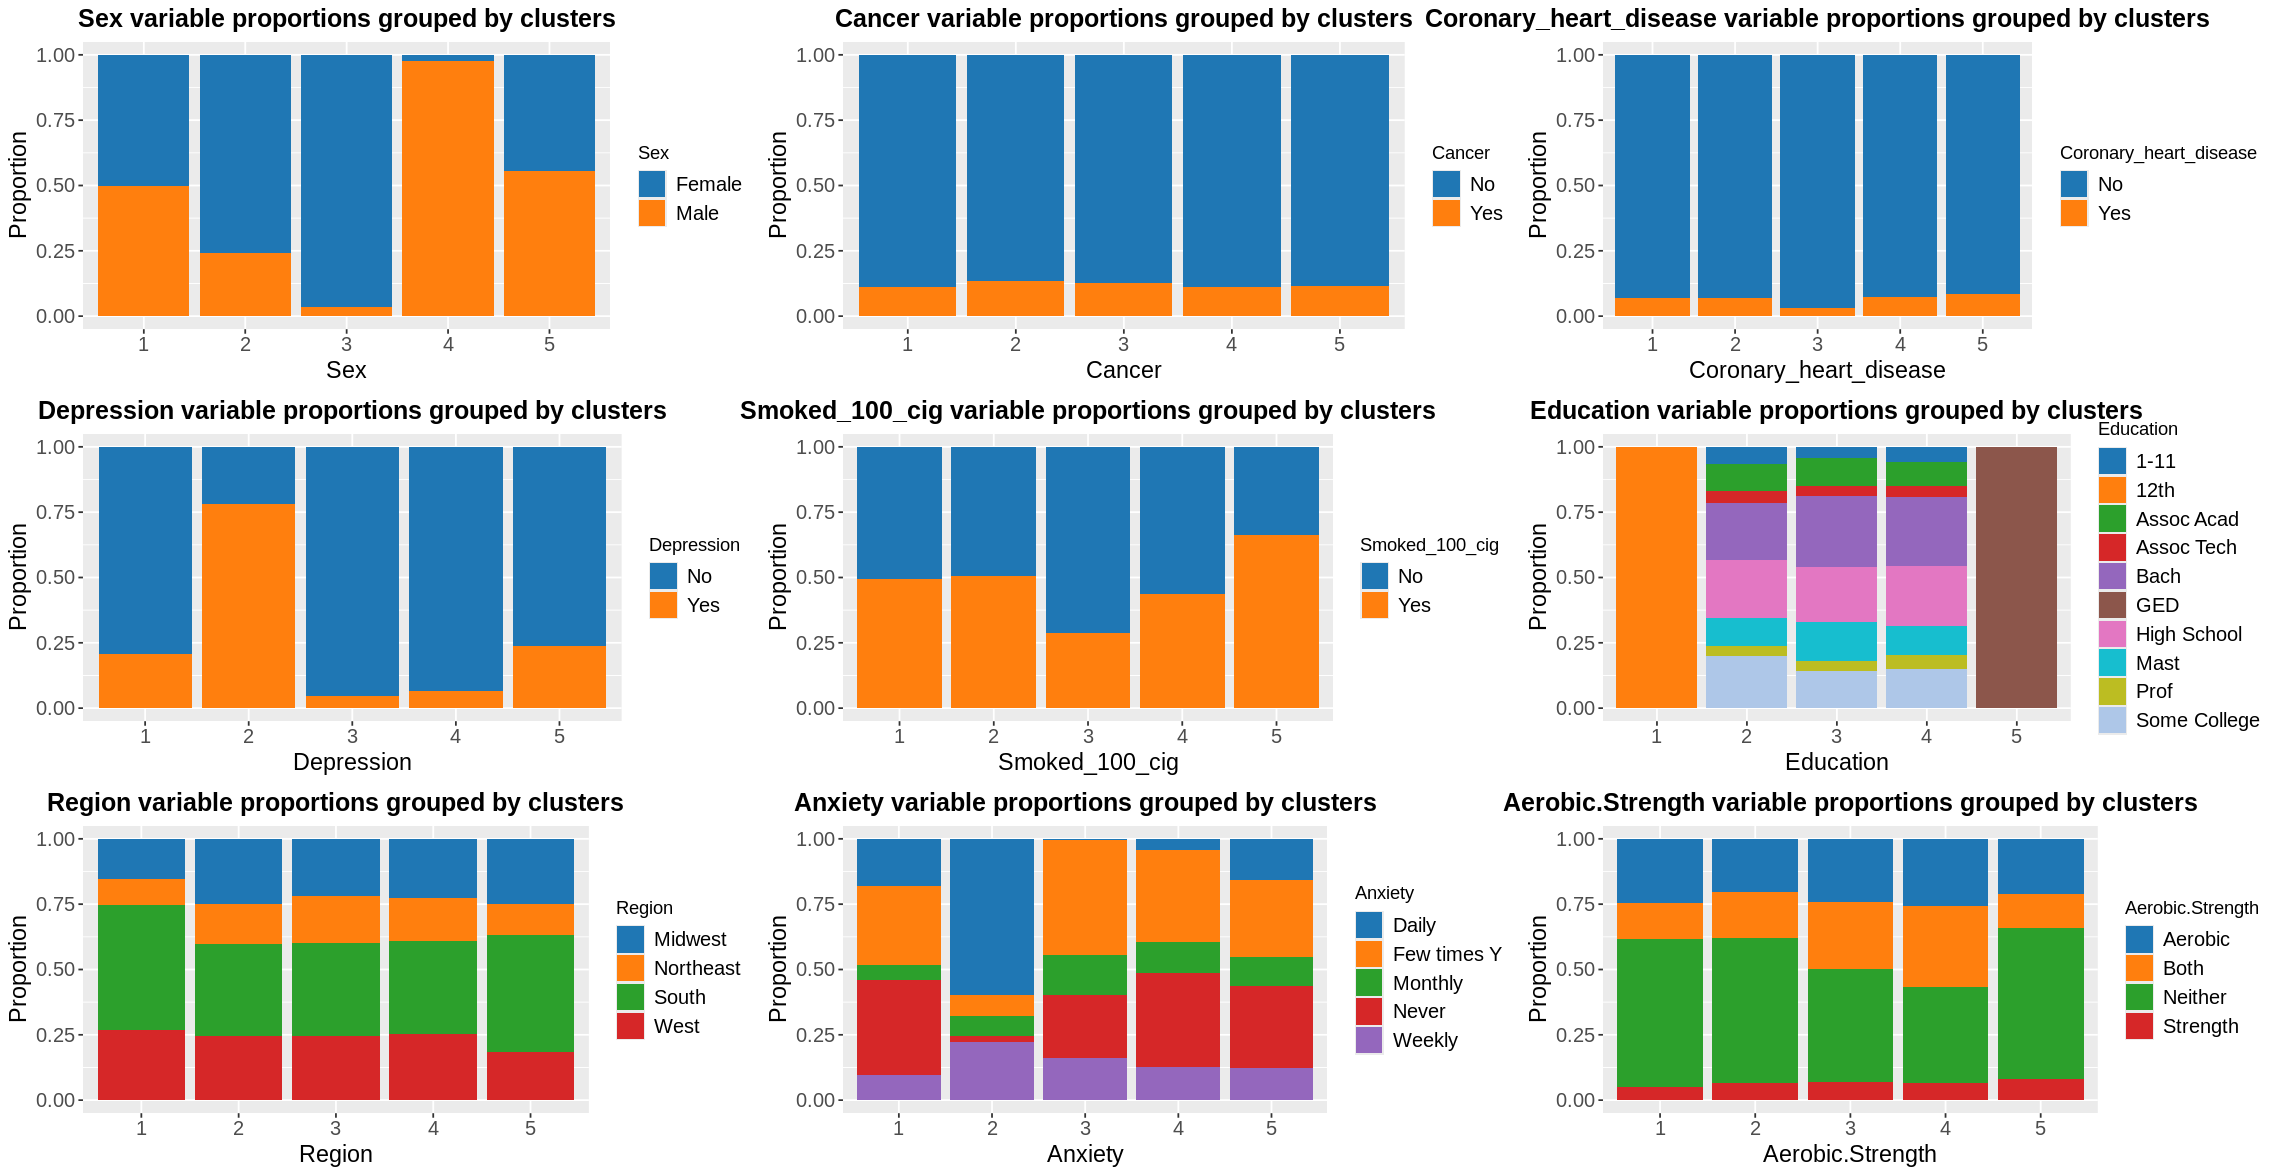

In [11]:
# Changing the size of the plot
options(repr.plot.width = 19, repr.plot.height = 9.8)

# Creating vector of differnet colors to be used
colors <- c("#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
            "#9467BD", "#8C564B", "#E377C2", "#17BECF",
            "#BCBD22", "#AEC7E8")

# Function to create boxplot for each numeric column grouped by clusters.
plot_proportion_plot <- function(data, col_name) {
  ggplot(df, aes(x = .data[['clusters']], fill = .data[[col_name]])) +
    # Add plot
    geom_bar(position = 'fill') +
    # Add title, x-axis label, and y-axis label
    labs(title = paste0(col_name, ' variable proportions grouped by clusters'), x = col_name, y = 'Proportion') +
    # Add custom colors
    scale_fill_manual(values = colors) +
    # Adjusting the text appearance
    theme(axis.text.x = element_text(size=12),
          axis.text.y = element_text(size=12),
          axis.title.x = element_text(size=14),
          axis.title.y = element_text(size=14),
          plot.title = element_text(size=15, hjust = 0.5, face='bold'),
          plot.subtitle = element_text(size=14, hjust=0.5),
          legend.text = element_text(size=12))
}

# Create a list of proportion plots for each categorical column
plots <- lapply(names(df[, cat_cols]), function(col_name) {
  plot_proportion_plot(df[, cat_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

**Sex Variable**
* Clusters 1 and 5 are relatively balanced between males and females.
* Clusters 2 and 3 have a higher proportion of females.
* Cluster 4 is mostly male.

**Cancer Variable**
* All clusters are composed of mostly people without cancer.

**Coronary_heart_disease Variable**
* Across all clusters, most individuals do not have coronary heart disease.

**Depression  Variable**
* Clusters 1, 3, 4, and 5 have a majority of individuals without a history of depression.
* Cluster 2 has more individuals with depression.

**Smoked_100_cig Variable**
* Clusters 1 and 2 are relatively balanced between smokers and non-smokers.
* Clusters 3 and 4 contain more individuals who have not smoked 100 cigarettes.
* Cluster 5 has a higher proportion of individuals who have smoked 100 cigarettes.

**Education Variable**
* Cluster 1 consists solely of individuals who completed 12th grade with no diploma.
* Cluster 5 consists entirely of individuals with a GED.
* Clusters 2, 3, and 4 are mainly composed of individuals with some college, high school diplomas, or Bachelor's degrees.

**Region Variable**
* The South region dominates across all clusters.

**Anxiety Variable**
* Clusters 1 and 4 have the highest proportion of individuals who never experience anxious thoughts.
* Cluster 2 is dominated by individuals with daily anxiety.
* Cluster 3 mostly includes individuals who experience anxiety a few times per year.
* Cluster 5 is more evenly split between “never” and “a few times per year.”

**Aerobic.Strength Variable**
* In all clusters, the majority of individuals do not meet either aerobic or strength activity guidelines.


## Decision Trees

### Cluster 1

In [12]:
# Loading in Decision Tree function along with way to see decision tree
library(rpart)
install.packages('rpart.plot')
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



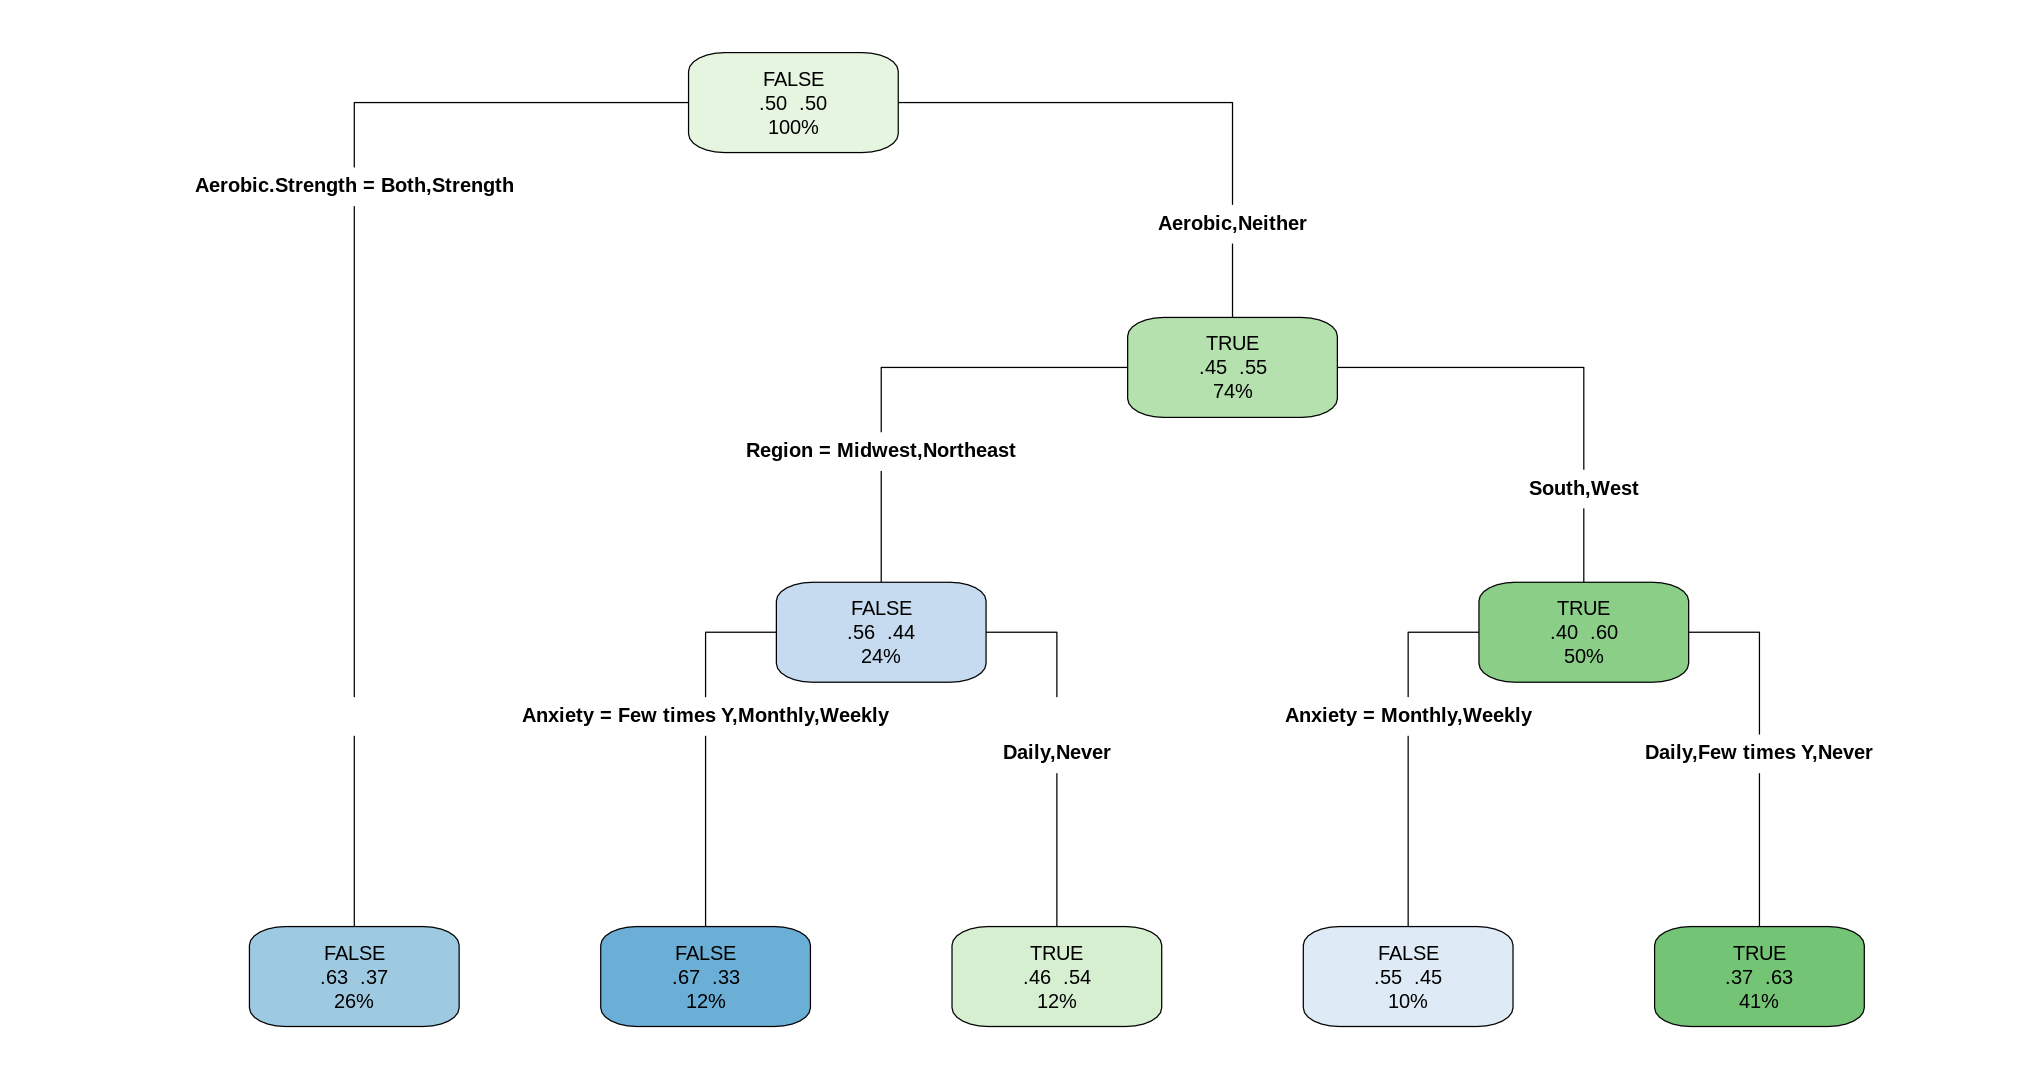

In [13]:
# Creating target variable (TRUE if cluster is 1 and False if not)
target_1 <- df$clusters == 1
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
# Assign higher weights to minority class (Cluster 1) so model pays more attention to it
w <- ifelse(target_1,
            1 / sum(target_1),
            1 / sum(!target_1))

clust_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
                  'Region', 'Anxiety','Aerobic.Strength')

# Fitting a decision tree
# Classifying target_1 based on all numerical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_1 ~ .,
            data = df[, c(clust_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree, specifying white background, and adjusting dimensions
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9)
rpart.plot(dt, type=4, extra=104, cex=1)

Since Cluster 1 for Education only had people with 12th grade and no degree, I decided to remove it since the decision tree would just use that to split the data.

The decision tree reveals the following patterns associated with Cluster 1 membership:
* Adults who meet both guidelines or just the strength guideline are unlikely to belong to Cluster 1.
* Adults who meet just the aerobic guideline or neither guideline, are from the Northeast or Midwest region, and have anxious thoughts (a few times/year, monthly, or weekly) are unlikely to belong to Cluster 1.
* Adults who meet just the aerobic guideline or neither guideline, are from the Northeast or Midwest region, and have anxious thoughts daily or never are likely to belong to Cluster 1.
* Adults who meet just the aerobic guideline or neither guideline, are from the South or West region, and have anxious thoughts monthly or weekly are unlikely to belong to Cluster 1.
* Adults who meet just the aerobic guideline or neither guideline, are from the South or West region, and have anxious thoughts (daily, a few times/year, or never) are likely to belong to Cluster 1.

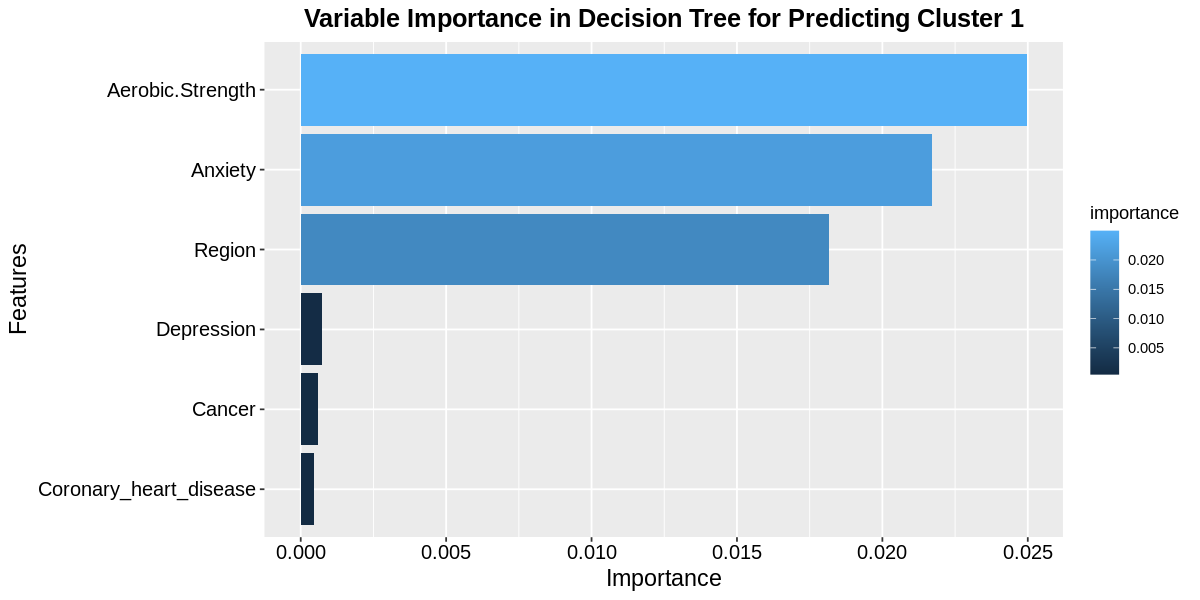

In [14]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for Predicting Cluster 1", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the most important feature was **Aerobic.Strength**, followed by **Anxiety**, **Region**, **Depression**, **Cancer**, and **Coronary_heart_disease**.

### Cluster 2

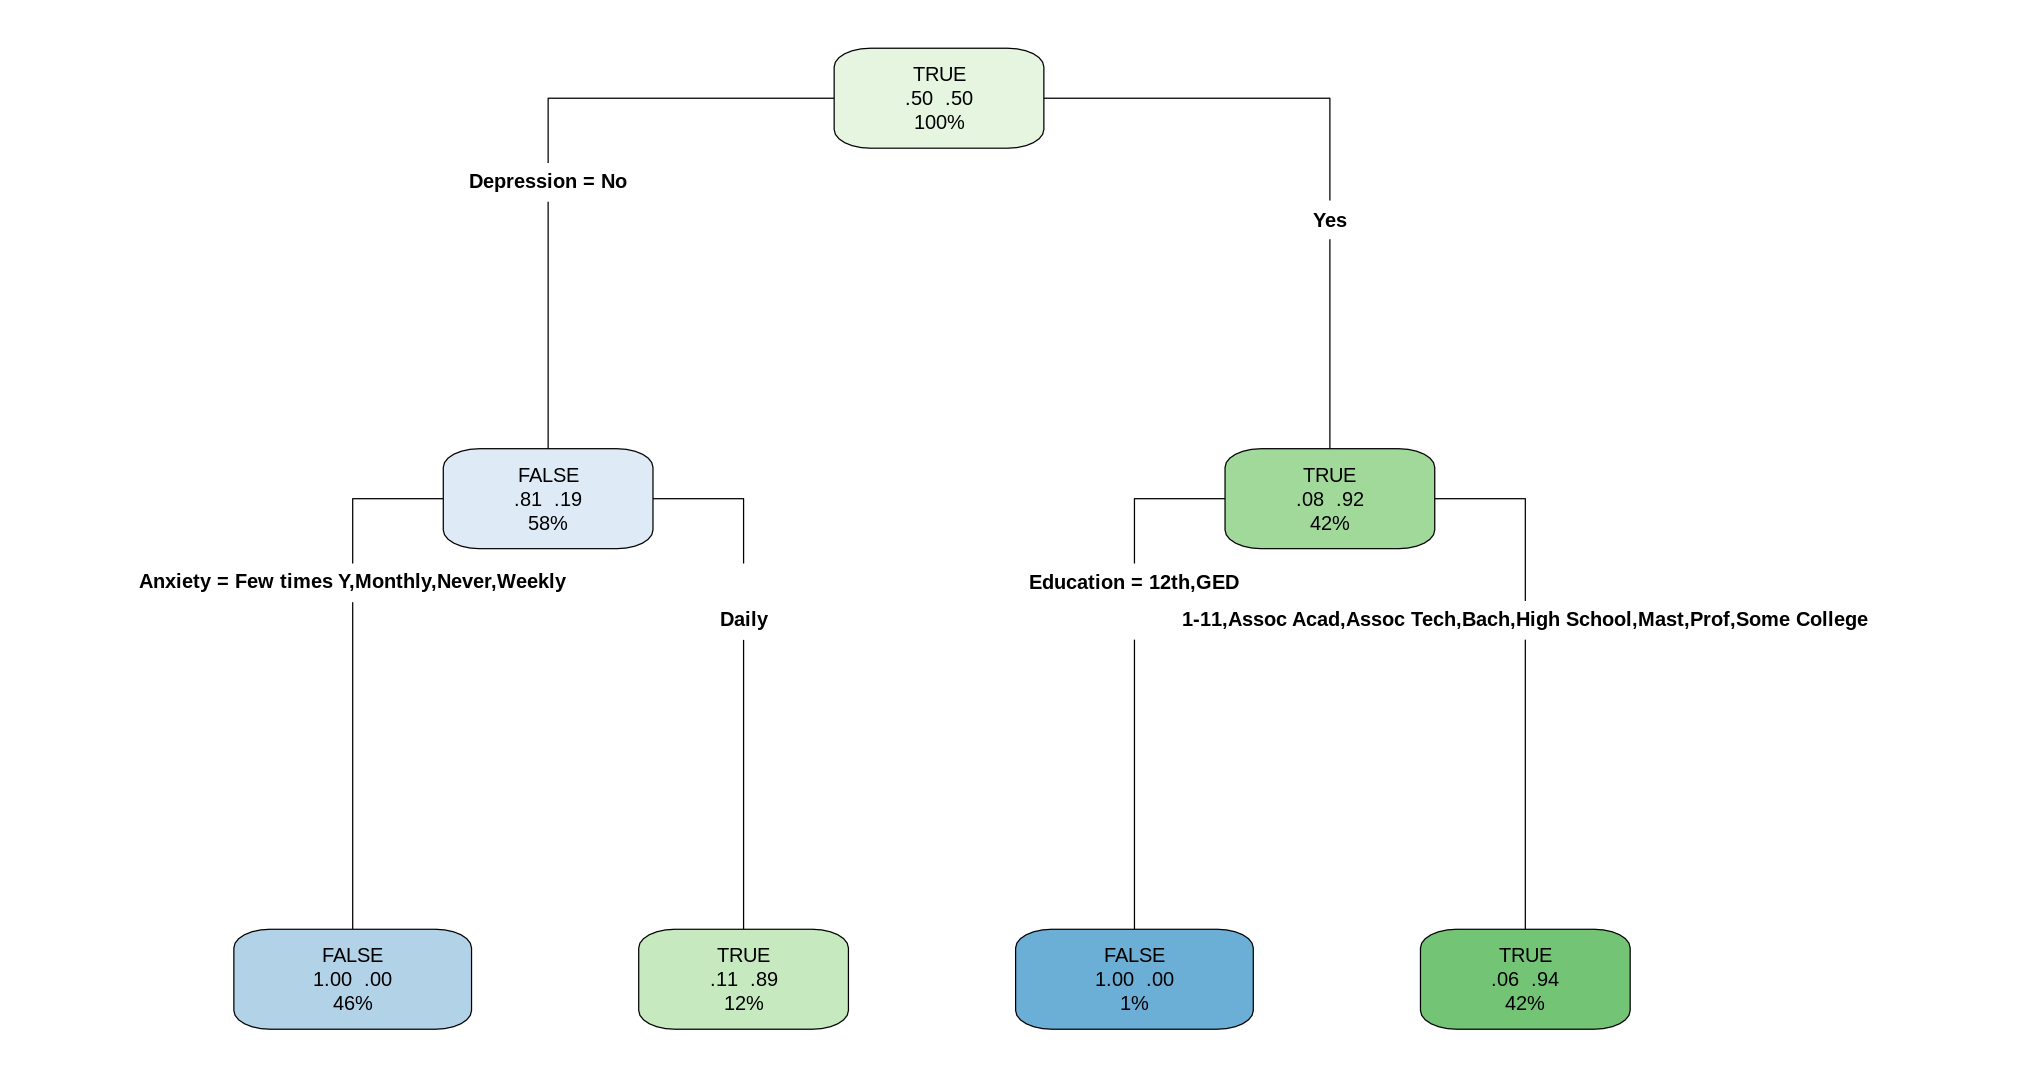

In [15]:
# Creating target variable (TRUE if cluster is 2 and False if not)
target_2 <- df$clusters == 2
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_2,
            1 / sum(target_2),
            1 / sum(!target_2))

# Fitting a decision tree
# Classifying target_2 based on all categorical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_2 ~ .,
            data = df[, c(cat_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree, specifying white background, and adjusting dimensions
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9)
rpart.plot(dt, type=4, extra=104, cex=1)

The decision tree reveals the following patterns associated with Cluster 2 membership:
* Adults who haven't had depression and have anxious thoughts (a few times/year, monthly, weekly, or never) are unlikely to belong to Cluster 2.
* Adults who haven't had depression and have anxious thoughts daily are likely to belong to Cluster 2.
* Adults who have had depression and have an education level of 12th grade with no diploma or GED are unlikely to belong to Cluster 2.
* Adults who have had depression and have any other education level besides 12th grade with no diploma or GED are likely to belong to Cluster 2.

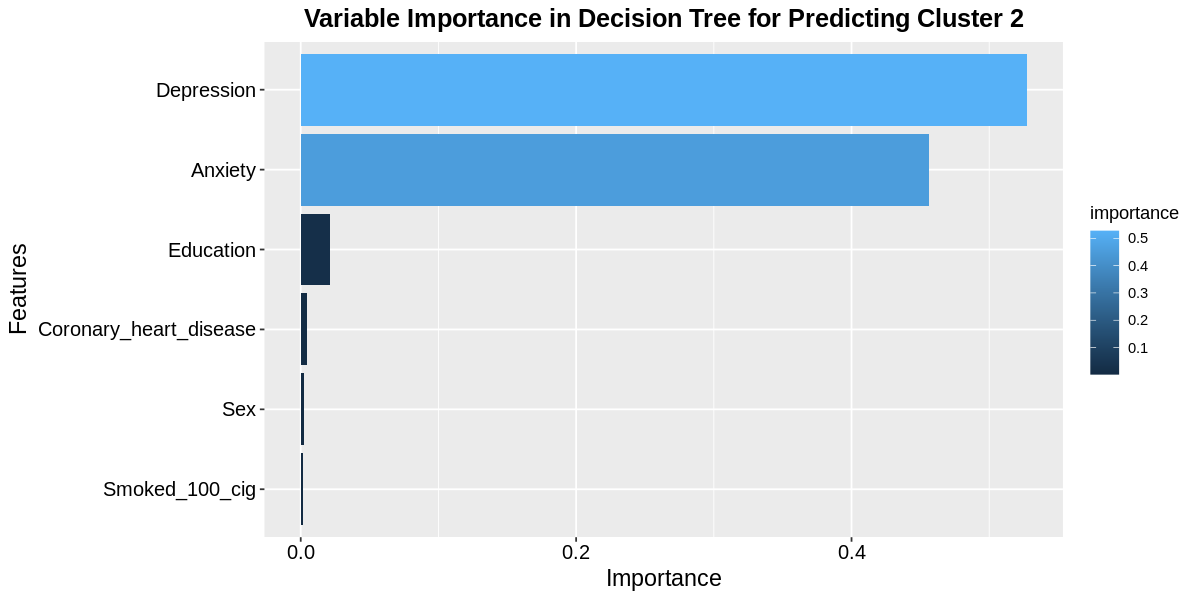

In [16]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for Predicting Cluster 2", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the most important feature was **Depression**, followed by **Anxiety**, **Education**, **Coronary_heart_disease**, **Sex**, and **Smoked_100_cig**.

### Cluster 3

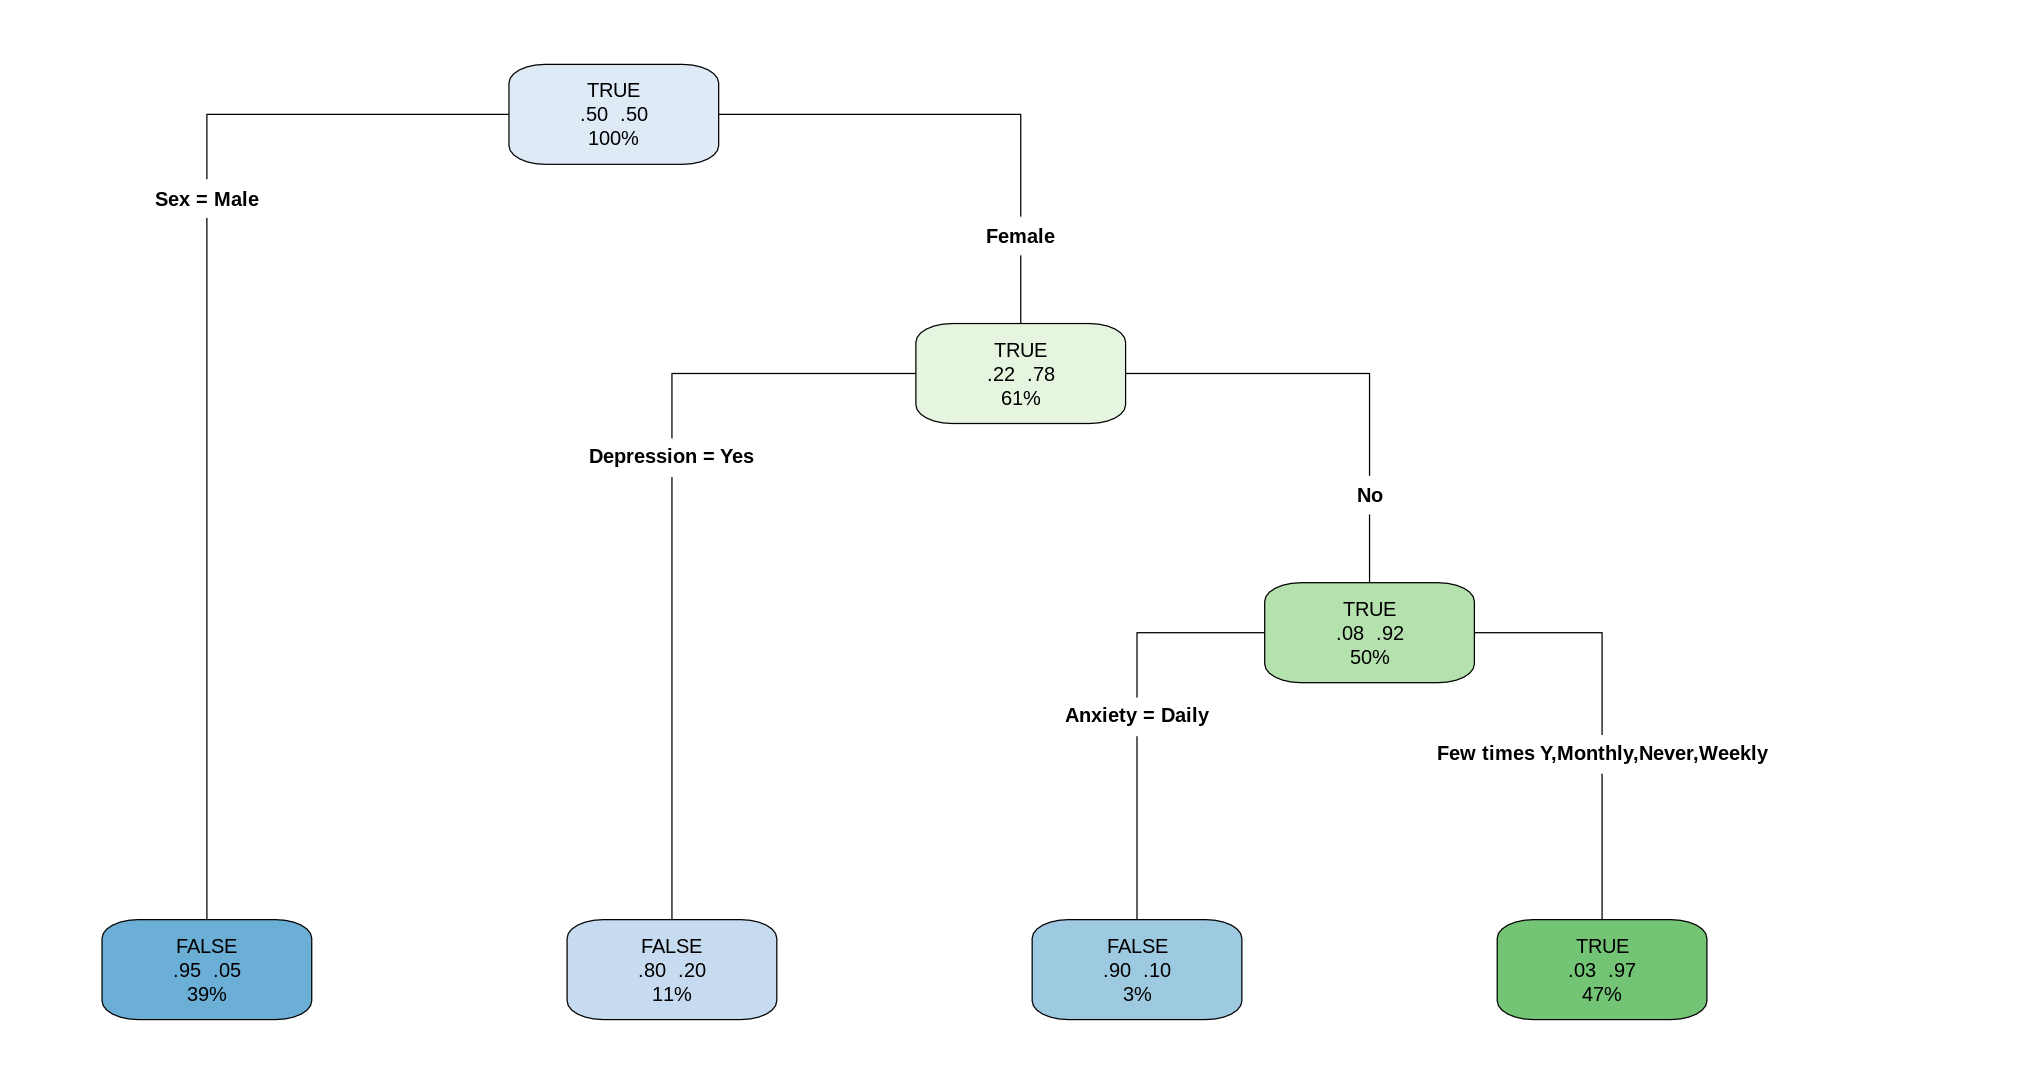

In [17]:
# Creating target variable (TRUE if cluster is 3 and False if not)
target_3 <- df$clusters == 3
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_3,
            1 / sum(target_3),
            1 / sum(!target_3))

# Fitting a decision tree
# Classifying target_3 based on all categorical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_3 ~ .,
            data = df[, c(cat_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree, specifying white background, and adjusting dimensions
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9)
rpart.plot(dt, type=4, extra=104, cex=1)

The decision tree reveals the following patterns associated with Cluster 3 membership:
* Adults who are male are not likely to belong to Cluster 3.
* Adults who are female and have had depression are unlikely to belong to Cluster 3.
* Adults who are female, have not had depression, and have anxious thoughts daily are unlikely to belong to Cluster 3.
* Adults who are female, have not had depression, and have anxious thoughts (a few times/year, monthly, weekly, or never) are likely to belong to Cluster 3.

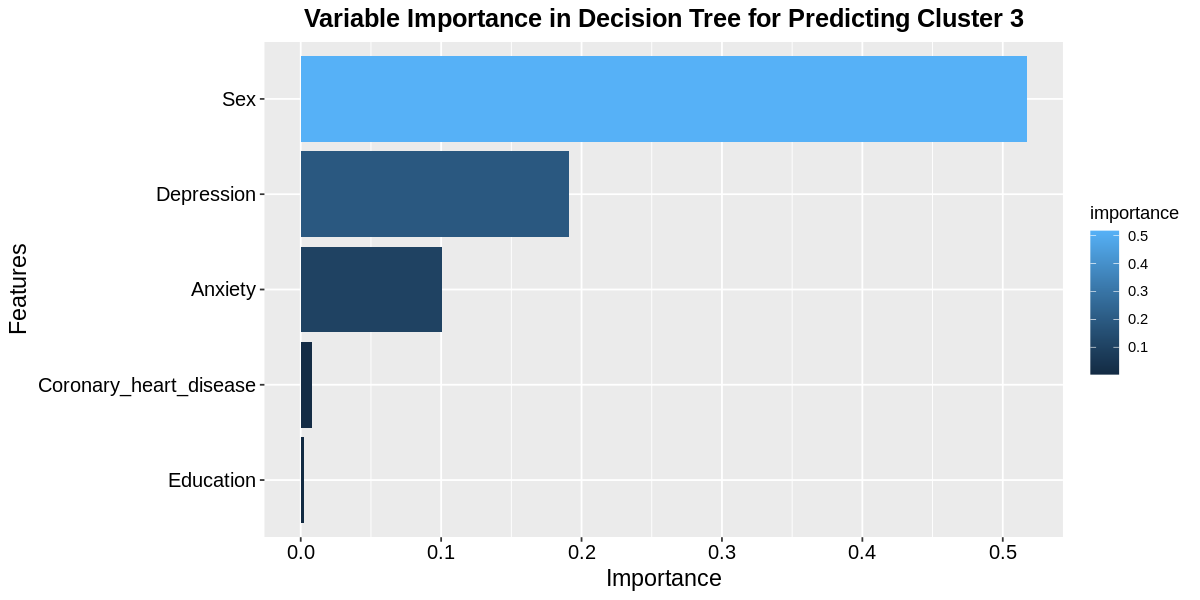

In [18]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for Predicting Cluster 3", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the most important feature was **Sex**, followed by **Depression**, **Anxiety**, **Coronary_heart_disease**, and **Education**.

### Cluster 4

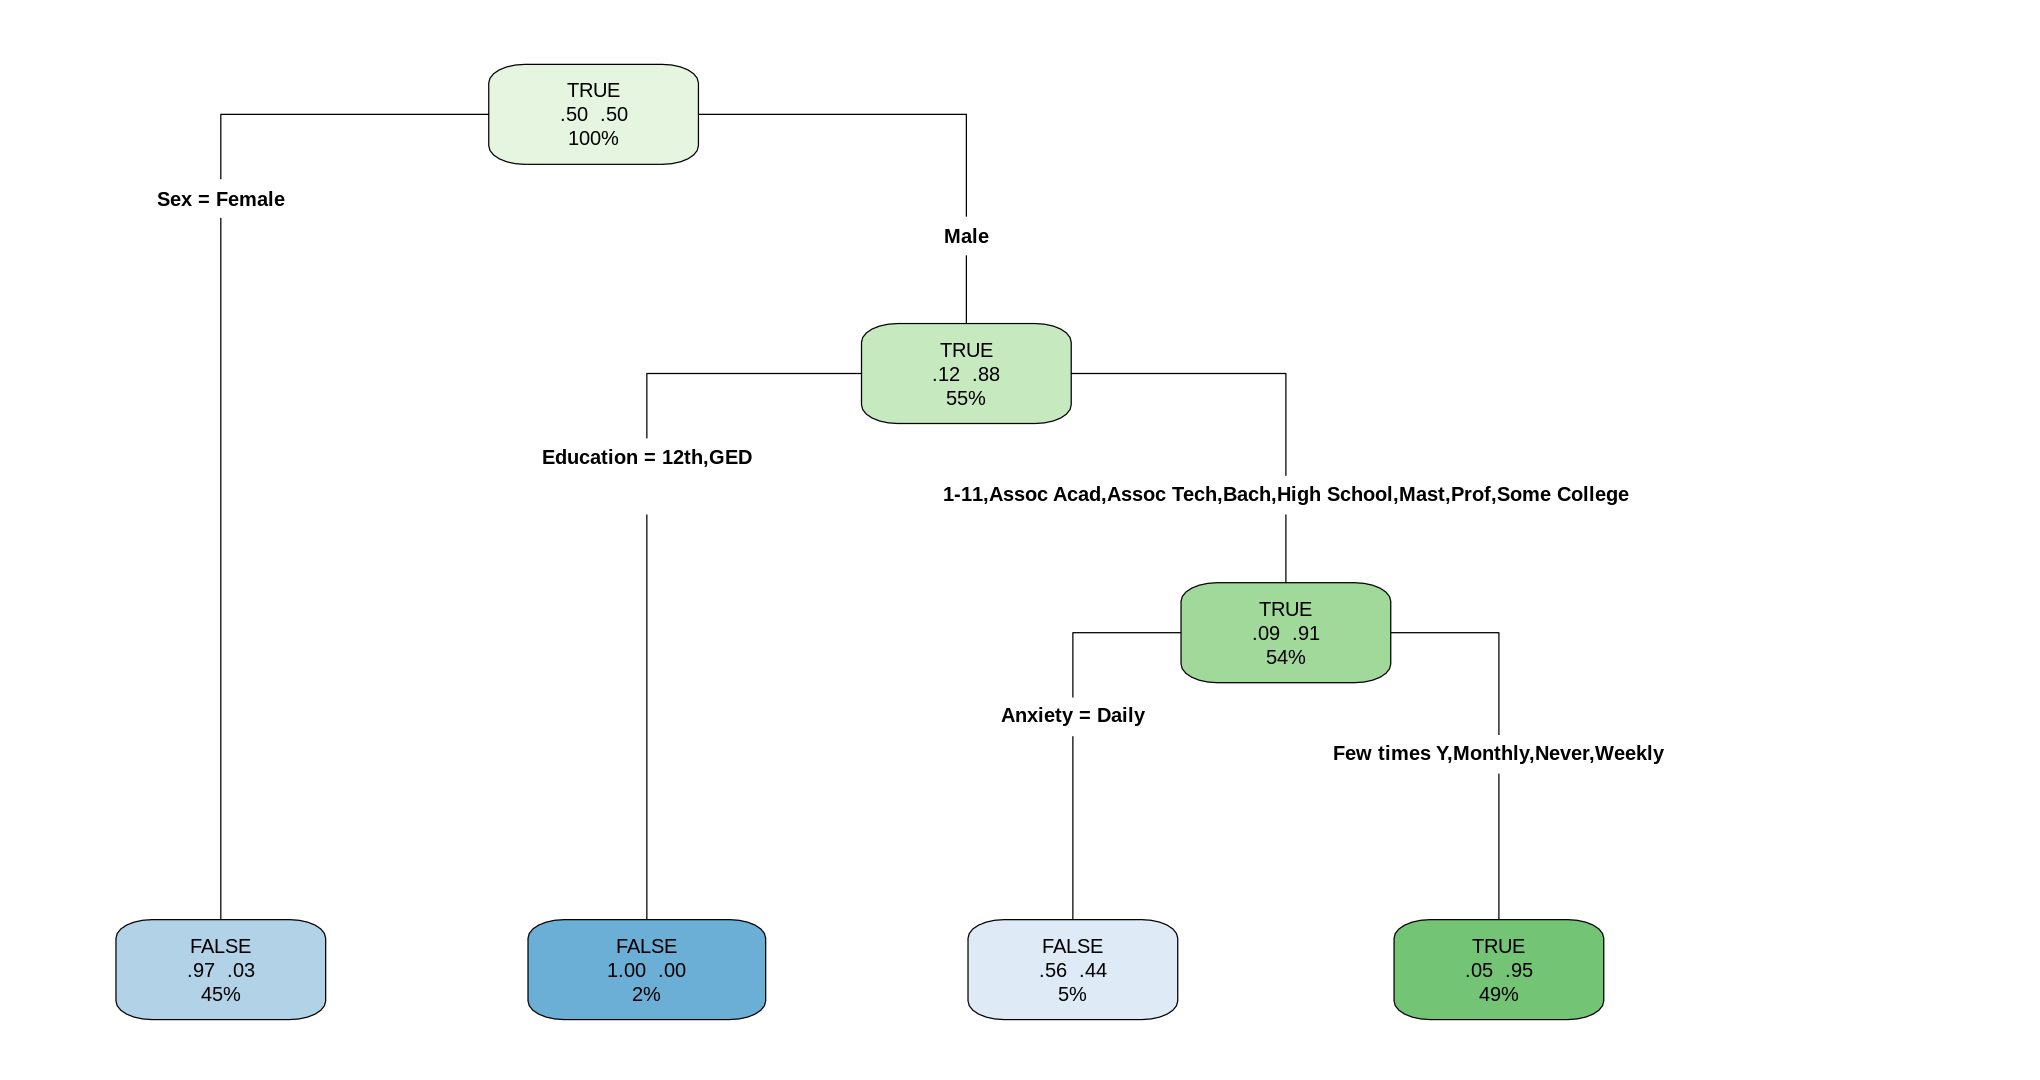

In [19]:
# Creating target variable (TRUE if cluster is 4 and False if not)
target_4 <- df$clusters == 4
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_4,
            1 / sum(target_4),
            1 / sum(!target_4))

# Fitting a decision tree
# Classifying target_4 based on all categorical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_4 ~ .,
            data = df[, c(cat_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree, specifying white background, and adjusting dimensions
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9)
rpart.plot(dt, type=4, extra=104, cex=1)

The decision tree reveals the following patterns associated with Cluster 4 membership:
* Adults who are female are unlikely to belong to Cluster 4.
* Adults who are male and have an education level of 12th grade with no diploma or a GED are unlikely to belong to Cluster 4.
* Adults who are male, have an education level other than 12th grade with no diploma or a GED, and have anxious thoughts daily are unlikely to belong to Cluster 4.
* Adults who are male, have an education level other than 12th grade with no diploma or a GED, and have anxious thoughts (a few times/year, monthly, weekly, or never) are likely to belong to Cluster 4.

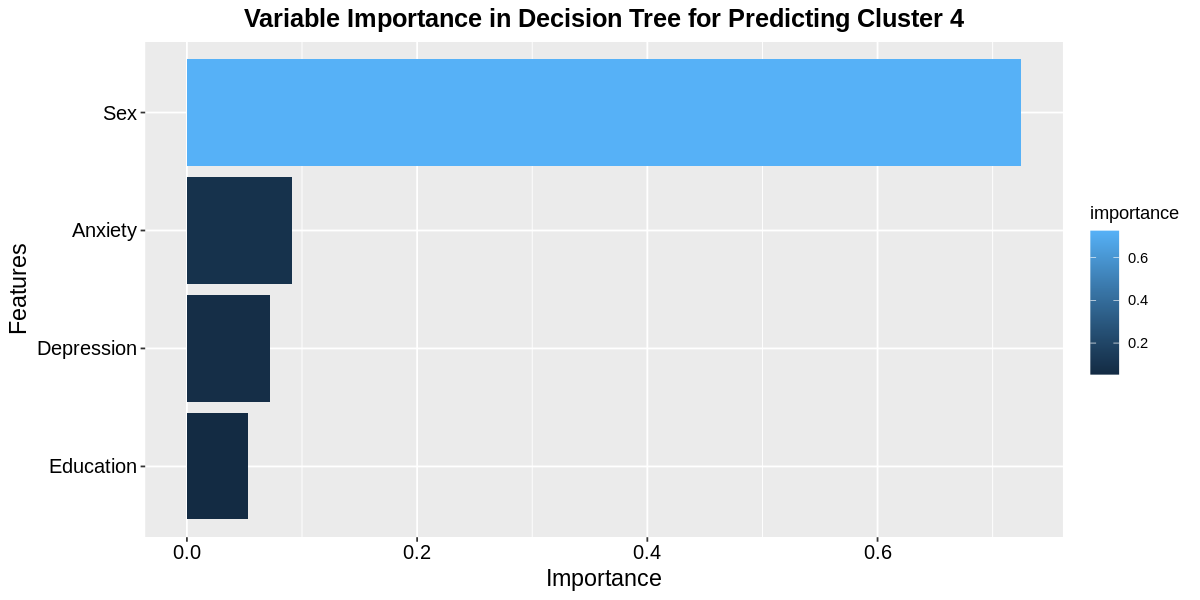

In [20]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for Predicting Cluster 4", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the most important feature was **Sex**, followed by **Anxiety**, **Depression**, and **Education**.

### Cluster 5

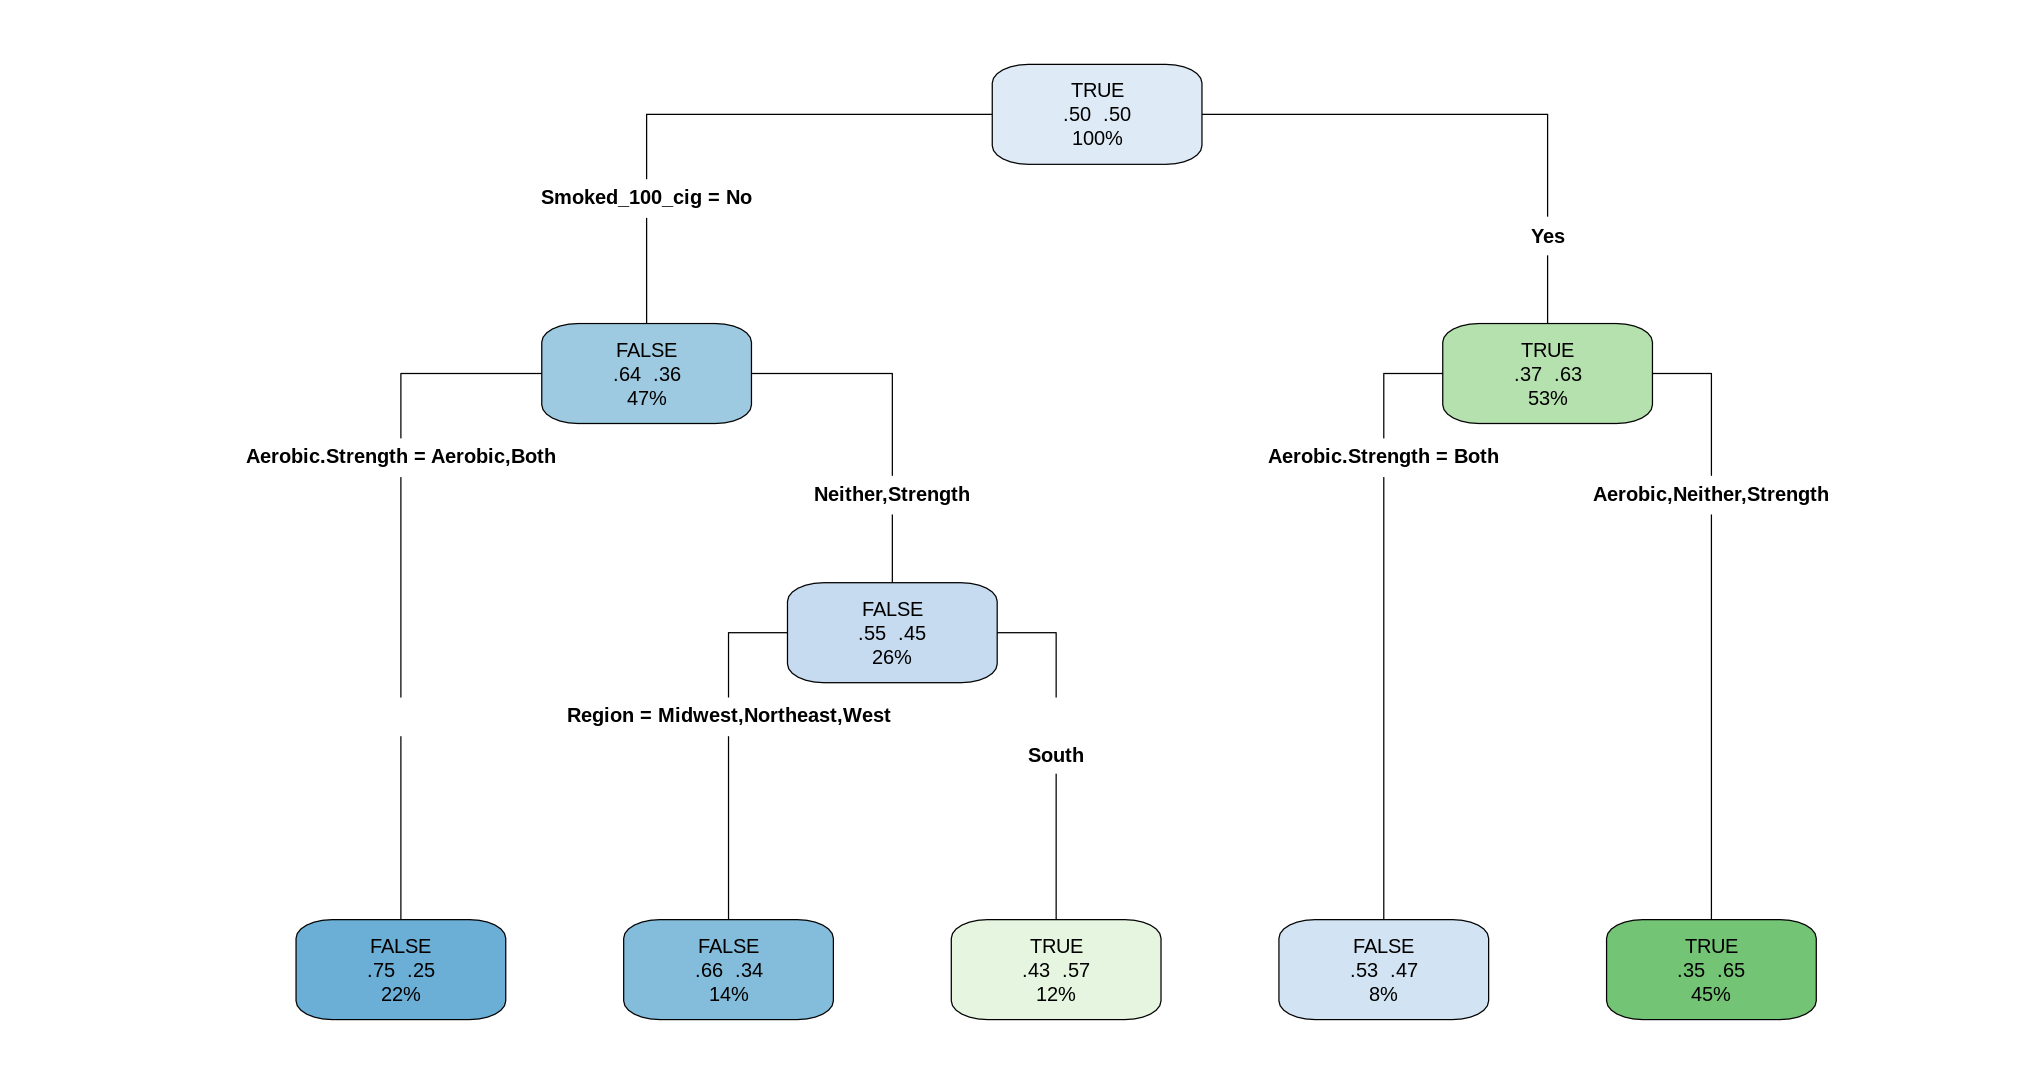

In [21]:
# Creating target variable (TRUE if cluster is 5 and False if not)
target_5 <- df$clusters == 5
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_5,
            1 / sum(target_5),
            1 / sum(!target_5))

# Fitting a decision tree
# Classifying target_5 based on all categorical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_5 ~ .,
            data = df[, c(clust_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree, specifying white background, and adjusting dimensions
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9)
rpart.plot(dt, type=4, extra=104, cex=1)

The decision tree reveals the following patterns associated with Cluster 5 membership:
* Adults who haven't smoked 100 cigarettes and meet both the aerobic and strength guidelines, or just the aerobic guideline, are unlikely to belong to Cluster 5.
* Adults who haven't smoked 100 cigarettes, meet neither guideline or just the strength guideline, and are from the Midwest, Northeast, or West regions are unlikely to belong to Cluster 5.
* Adults who haven't smoked 100 cigarettes, meet neither guideline or just the strength guideline, and are from the South region are likely to belong to Cluster 5.
* Adults who have smoked 100 cigarettes and meet both the aerobic and strength guidelines are unlikely to belong to Cluster 5.
* Adults who have smoked 100 cigarettes and do not meet both guidelines (meet just one or neither) are likely to belong to Cluster 5.

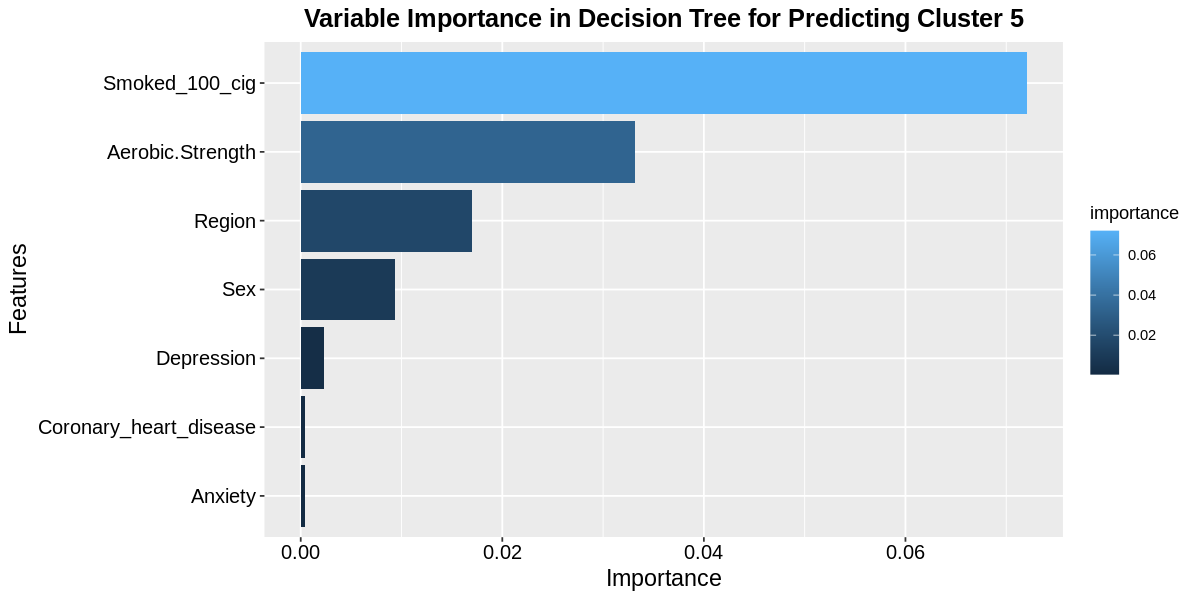

In [22]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for Predicting Cluster 5", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the most important feature was **Smoked_100_cigarettes**, followed by **Aerobic.Strength**, **Region**, **Sex**, **Depression**, **Coronary_heart_disease**, and **Anxiety**.

## Conclusion

This notebook is defined by 3 key sections:
1. **Contingency Tables**
2. **Proportion Plots**
3. **Basic Decision Trees**

The first section looked at the contingency tables between each categorical variable and the 5 clusters. The main insights from this were:
* Cluster 1: Only those with 12th grade and no diploma education with mainly no anxiety.
* Cluster 2: More females with a history of depression, mostly High School diplomas, and mostly those with anxious thoughts daily.
* Cluster 3: Mostly females with more non-smokers, mostly those with a Bachelor's degree, and mostly those with anxious thoughts a few times per year.
* Cluster 4: Mainly males with a Bachelor's degree with most with no anxiety.
* Cluster 5: Only those with a GED and more individuals with no anxiety.

The second section is fairly similar to the above section, but in a visual format. The main insights were:
* Females dominated cluster 3 while males dominated cluster 4.
* Around 75% of individuals in cluster 2 have had depression.
* More than 50% of individuals in cluster 2 have anxious thoughts daily.

The third section deals with using basic decision trees to see general patterns for separating each individual cluster from the rest. Mainly, insights were:
* After removing Education for Cluster 1 and Cluster 5, the initial split for Cluster 1 was those who meet both guidelines or just the strength guideline, while Cluster 5's initial split was those who had smoked 100 cigarettes.
* First split for clusters 3 and 4 were the sex variable.
* First split for cluster 2 was the depression variable.
* The region variable only appeared in the tree for Clusters 1 and 5.